In [1]:
import pandas as pd

In [2]:
basketball_data = pd.read_csv(r'C:\Users\Jake\Documents\GitHub\DATAPLAYGROUND2\csv\Basketball_Final_Stats.csv')
basketball_data

,Team,Game_ID,Points_Scored,Points_Allowed,Win,Field Goals Made,Field Goals Attempted,Free Throws Made,Free Throws Attempted,Three Point Made,...,Offensive_Efficiency_Allowed,Efficient Points Score_Allowed,Raw EOP_Allowed,Two Points Per Attempt_Allowed,Three Points Per Attempt_Allowed,Total Points Per Attempt_Allowed,Scoring_Possesions_Allowed,Team Play Percent_Allowed,Possesions_Allowed,Offensive_Efficieny_Difference
0,Laconia,33023432,72,33,1,28,71,9,15,7,...,0.301587,21.714286,18.336508,0.476190,0.750000,0.594595,11.304762,0.167726,69.52,0.051354
1,Campbellsport,33023432,33,72,0,9,37,11,21,4,...,0.352941,11.647059,14.484706,0.976744,0.750000,0.887324,30.160000,0.354824,91.35,-0.051354
2,Laconia,33023434,87,41,1,33,59,9,15,12,...,0.205882,17.911765,14.708235,0.823529,0.857143,0.829268,17.400000,0.227154,76.70,0.131618
3,Lomira,33023434,41,87,0,16,41,7,14,2,...,0.337500,13.837500,15.133500,1.200000,1.500000,1.322034,35.160000,0.475135,85.18,-0.131618
4,Laconia,33023435,58,16,1,23,69,5,7,7,...,0.089552,5.194030,4.219701,0.307692,0.857143,0.424242,6.320000,0.090286,75.85,0.134132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,Appleton East,33027533,105,96,1,34,49,27,39,7,...,0.513514,53.918919,45.271351,1.230769,1.000000,1.150000,39.576471,0.457003,86.30,0.118839
2068,Kimberly,33027534,82,78,1,32,56,10,15,8,...,0.308642,25.308642,23.222222,1.096774,1.500000,1.272727,32.200000,0.445983,85.65,-0.004294
2069,Appleton East,33027534,78,82,0,29,55,8,8,12,...,0.304348,23.739130,20.586087,1.200000,1.500000,1.285714,34.666667,0.509804,80.12,0.004294
2070,Marshfield,33027535,55,69,0,18,49,10,13,9,...,0.391304,21.521739,22.304348,1.280000,1.200000,1.240000,27.633333,0.440021,68.37,-0.123447


In [3]:
basketball_data.columns

Index(['Team', 'Game_ID', 'Points_Scored', 'Points_Allowed', 'Win',
       'Field Goals Made', 'Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Three Point Made', 'Three Point Attempted',
       'Total Points', 'Offensive Rebounds', 'Defensive Rebounds',
       'Total Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Fouls',
       'Technical Fouls', 'Offensive_Efficiency', 'Efficient Points Score',
       'Raw EOP', 'Two Points Per Attempt', 'Three Points Per Attempt',
       'Total Points Per Attempt', 'Scoring_Possesions', 'Team Play Percent',
       'Possesions', 'Field Goals Made_Allowed',
       'Field Goals Attempted_Allowed', 'Free Throws Made_Allowed',
       'Free Throws Attempted_Allowed', 'Three Point Made_Allowed',
       'Three Point Attempted_Allowed', 'Total Points_Allowed',
       'Offensive Rebounds_Allowed', 'Defensive Rebounds_Allowed',
       'Total Rebounds_Allowed', 'Assists_Allowed', 'Turnovers_Allowed',
       'Steals_Allowed'

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
def get_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [vif(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [5]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [6]:
basketball_data_drop_extra = basketball_data.drop(columns = ['Team', 'Game_ID', 'Win', 'Total Points', 
                                                             'Total Points_Allowed', 'Scoring_Possesions', 'Scoring_Possesions_Allowed', 
                                                             'Efficient Points Score', 'Efficient Points Score_Allowed', 'Points_Allowed', 
                                                             'Field Goals Attempted', 'Offensive Rebounds', 'Offensive_Efficiency', 'Field Goals Attempted_Allowed', 
                                                             'Offensive Rebounds_Allowed', 'Turnovers_Allowed', 'Possesions_Allowed', 'Offensive_Efficieny_Difference',
                                                             'Field Goals Made', 'Three Point Attempted', 'Raw EOP', 'Total Points Per Attempt', 'Team Play Percent',
                                                             'Possesions', 'Field Goals Made_Allowed', 'Total Points Per Attempt_Allowed', 'Offensive_Efficiency_Allowed', 
                                                             'Free Throws Made', 'Free Throws Attempted', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Turnovers', 'Raw EOP_Allowed',
                                                             'Team Play Percent_Allowed', 'Total Rebounds_Allowed'])

In [7]:
get_top_abs_correlations(basketball_data_drop_extra)

Free Throws Made_Allowed  Free Throws Attempted_Allowed       0.865278
Three Point Made_Allowed  Three Point Attempted_Allowed       0.733588
                          Three Points Per Attempt_Allowed    0.649288
Three Point Made          Three Points Per Attempt            0.649288
Points_Scored             Three Point Made                    0.598019
dtype: float64

In [8]:
basketball_data_drop_extra.to_csv('Test_Data.bz2', index = False, compression = 'bz2')
basketball_data_drop_extra.to_csv('Test_Data.csv', index = False)

In [9]:
my_vif = get_vif(basketball_data_drop_extra)
my_vif

,Feature,VIF
0,Points_Scored,25.744540
1,Three Point Made,7.601531
2,Steals,6.845597
3,Blocks,1.995710
4,Fouls,3.306712
5,Technical Fouls,1.022413
6,Two Points Per Attempt,5.006933
7,Three Points Per Attempt,7.721938
8,Free Throws Made_Allowed,18.124949
9,Free Throws Attempted_Allowed,23.945760


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

y = basketball_data_drop_extra['Points_Scored'].values
X = basketball_data_drop_extra.drop(columns = ['Points_Scored']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 13)
scaler = MinMaxScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_full_std = np.vstack((X_train_std, X_test_std))

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
def get_reg_cross(model_name, model, X, y, cv_val = 5):
    cv = cross_val_score(model, X, y, cv = cv_val, scoring = 'neg_mean_squared_error')
    mean_cv = cv.mean()
    print(f'Mean Cross Val Score for {model_name}: {mean_cv}')
    return mean_cv

In [12]:
ridge = Ridge()
ennet = ElasticNet()
lasso = Lasso()
lin = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 5)
svr = SVR(C = .01)
neural = MLPRegressor(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5, 2), random_state = 13)
model_dict = {'Ridge' : ridge, 'Elastic-Net' : ennet, 'Lasso' : lasso, 'Linear Regression' : lin,
              'K-Nearest Neighbor' : knn, 'Support Vector Machine' : svr, 'Neural Network' : neural}

In [13]:
for key, val in model_dict.items():
    print(val)
    cv = cross_val_score(val, X_full_std, y, scoring = 'neg_mean_absolute_error')
    print(cv.mean())

Ridge()
-12.96125691573296
ElasticNet()
-12.906985120622185
Lasso()
-12.906985120622185
LinearRegression()
-12.979942381673908
KNeighborsRegressor()
-13.853059309702578
SVR(C=0.01)
-12.910681444609361
MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=13,
             solver='lbfgs')
-12.906985120607851


In [14]:
ridge_fit = ElasticNet().fit(X_train_std, y_train)
pred = ridge_fit.predict(X_test_std)
my_coefs = ridge_fit.coef_
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true = y_test, y_pred = pred)

12.53136149365868

In [15]:
col_coef = pd.DataFrame(dict(zip(basketball_data_drop_extra.drop(columns = ['Points_Scored']).columns, list(my_coefs))).items(), columns = ['Variable', 'Lasso Coef'])
col_coef


,Variable,Lasso Coef
0,Three Point Made,1.691058
1,Steals,0.679764
2,Blocks,0.000000
3,Fouls,-0.000000
4,Technical Fouls,-0.000000
5,Two Points Per Attempt,0.000000
6,Three Points Per Attempt,0.261442
7,Free Throws Made_Allowed,-0.000000
8,Free Throws Attempted_Allowed,-0.000000
9,Three Point Made_Allowed,-0.000000


In [16]:
basketball_data.columns

Index(['Team', 'Game_ID', 'Points_Scored', 'Points_Allowed', 'Win',
       'Field Goals Made', 'Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Three Point Made', 'Three Point Attempted',
       'Total Points', 'Offensive Rebounds', 'Defensive Rebounds',
       'Total Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Fouls',
       'Technical Fouls', 'Offensive_Efficiency', 'Efficient Points Score',
       'Raw EOP', 'Two Points Per Attempt', 'Three Points Per Attempt',
       'Total Points Per Attempt', 'Scoring_Possesions', 'Team Play Percent',
       'Possesions', 'Field Goals Made_Allowed',
       'Field Goals Attempted_Allowed', 'Free Throws Made_Allowed',
       'Free Throws Attempted_Allowed', 'Three Point Made_Allowed',
       'Three Point Attempted_Allowed', 'Total Points_Allowed',
       'Offensive Rebounds_Allowed', 'Defensive Rebounds_Allowed',
       'Total Rebounds_Allowed', 'Assists_Allowed', 'Turnovers_Allowed',
       'Steals_Allowed'

In [17]:
basketball_data_2 = basketball_data[[ 'Win', 'Field Goals Made', 'Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Three Point Made', 'Three Point Attempted', 'Offensive Rebounds', 'Defensive Rebounds',
       'Total Rebounds', 'Assists', 'Turnovers', 'Steals', 'Blocks', 'Fouls',
       'Technical Fouls', 'Two Points Per Attempt', 'Three Points Per Attempt',
       'Total Points Per Attempt', 'Team Play Percent',
       'Possesions', 'Field Goals Made_Allowed',
       'Field Goals Attempted_Allowed', 'Free Throws Made_Allowed',
       'Free Throws Attempted_Allowed', 'Three Point Made_Allowed',
       'Three Point Attempted_Allowed', 'Total Points_Allowed',
       'Offensive Rebounds_Allowed', 'Defensive Rebounds_Allowed',
       'Total Rebounds_Allowed', 'Assists_Allowed', 'Turnovers_Allowed',
       'Steals_Allowed', 'Blocks_Allowed', 'Fouls_Allowed',
       'Technical Fouls_Allowed', 
       'Two Points Per Attempt_Allowed', 'Three Points Per Attempt_Allowed',
       'Total Points Per Attempt_Allowed', 'Possesions_Allowed',]]

In [18]:
X_win = basketball_data_2.drop(columns = ['Win']).values 
y_win = basketball_data_2['Win'].values 
X_win_train, X_win_test, y_win_train, y_win_test = train_test_split(X_win, y_win, stratify = y_win, test_size = .3, random_state = 13)
scaler_win = MinMaxScaler().fit(X_win_train)
X_win_train_std = scaler_win.transform(X_win_train)
X_win_test_std = scaler_win.transform(X_win_test)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd, confusion_matrix as cm, accuracy_score, f1_score
knn_fit = KNeighborsClassifier(n_neighbors = 10).fit(X_win_train_std, y_win_train)
log_fit = LogisticRegression().fit(X_win_train_std, y_win_train)
rf_fit = RandomForestClassifier(n_estimators = 5000, max_features = 4).fit(X_win_train, y_win_train)
log_pred = log_fit.predict(X_win_test_std)
knn_predict = knn_fit.predict(X_win_test_std)
rf_pred = rf_fit.predict(X_win_test)
dummy = DummyClassifier(strategy = 'uniform').fit(X_win_train_std, y_win_train)
dummy_test = dummy.predict(X_win_test_std)

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_curve
vc = VotingClassifier(estimators=[('lr', LogisticRegression()), ('knn', KNeighborsClassifier(n_neighbors = 10)), ('rf', RandomForestClassifier(n_estimators = 1000))], voting= 'soft')
vc_fit = vc.fit(X_win_train_std, y_win_train)
vc_pred = vc_fit.predict(X_win_test_std)

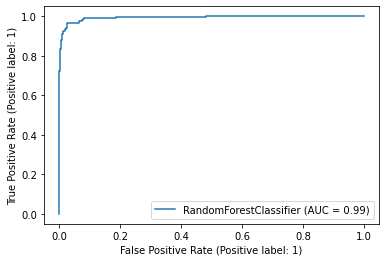

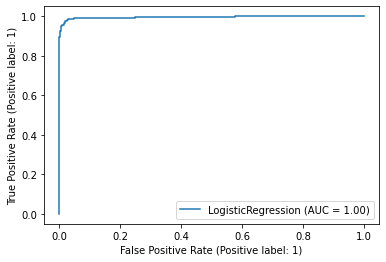

In [21]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(rf_fit, X_win_test, y_win_test)
RocCurveDisplay.from_estimator(log_fit, X_win_test_std, y_win_test)

In [22]:
f1_score(y_true = y_win_test, y_pred = log_pred, average = 'micro')

0.9758842443729904

In [156]:
f1_score(y_true = y_win_test, y_pred = rf_pred, average = 'macro')

0.9630224124606148

In [167]:
my_frame = pd.DataFrame(rf_fit.feature_importances_, columns = ['Weight'])
weights = pd.concat([my_frame, pd.DataFrame(basketball_data_2.drop(columns = ['Win']).columns, columns = ['Feature'])], axis = 'columns')

In [169]:
weights.sort_values(by = 'Weight', ascending = False)

,Weight,Feature
26,0.117592,Total Points_Allowed
18,0.115672,Team Play Percent
0,0.082558,Field Goals Made
20,0.069600,Field Goals Made_Allowed
17,0.051975,Total Points Per Attempt
38,0.049681,Total Points Per Attempt_Allowed
9,0.038551,Assists
30,0.033330,Assists_Allowed
15,0.031617,Two Points Per Attempt
36,0.030418,Two Points Per Attempt_Allowed


In [24]:
f1_score(y_true = y_win_test, y_pred = rf_pred)

0.9646302250803859

In [25]:
df_rf = pd.DataFrame(rf_fit.predict_proba(X_win_test) * 100, columns = ['Loss', 'Win'])
df_rf

,Loss,Win
0,11.58,88.42
1,0.06,99.94
2,52.26,47.74
3,0.78,99.22
4,99.14,0.86
...,...,...
617,38.30,61.70
618,24.02,75.98
619,95.74,4.26
620,75.46,24.54


In [26]:
import matplotlib.pyplot as plt

def cf_matrix(y_test, predict, fit):
    c_m = cm(y_test, predict, labels = fit.classes_)
    disp = cmd(c_m, display_labels = fit.classes_)
    disp.plot()
    plt.show()

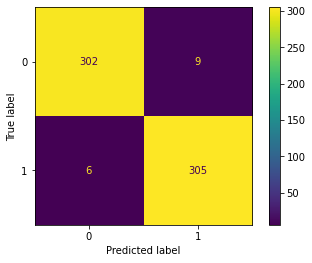

In [27]:
cf_matrix(y_win_test, log_pred, log_fit)

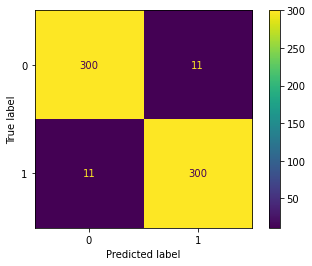

In [28]:
cf_matrix(y_win_test, rf_pred, rf_fit)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
rid_fit = RidgeClassifier().fit(X_win_train_std, y_win_train)
rid_predict = rid_fit.predict(X_win_test_std)
accuracy_score(y_true = y_win_test, y_pred = rid_predict)

0.9662379421221865

In [30]:
rid_coefs = rid_fit.coef_.tolist()
col = basketball_data_2.drop(columns = ['Win']).columns.tolist()
this_dict = {}
for coef, feat in zip(rid_fit.coef_[0,:], col):
    this_dict[feat] = coef


pandas_frame = pd.DataFrame.from_dict(this_dict, orient = 'index').rename(columns = {0 : 'Coefficient'})
pandas_frame

,Coefficient
Field Goals Made,1.319639
Field Goals Attempted,-0.242977
Free Throws Made,0.854795
Free Throws Attempted,0.244613
Three Point Made,0.718013
Three Point Attempted,-0.203663
Offensive Rebounds,-0.119009
Defensive Rebounds,0.100233
Total Rebounds,0.467559
Assists,0.103164


In [31]:
class Team:
    def __init__(self, Team_x, data): 
        self.Team_x = Team_x
        self.data = data[(data['Team'] == self.Team_x)]

    def getPointsScored(self):
        return self.data['Points_Scored'].values

    def getPointsAllowed(self):
        return self.data['Points_Allowed'].values

In [32]:
import random as rd
def sim_once(team1,team2):
    score_team1 = rd.gauss(team1.getPointsScored().mean(),team1.getPointsScored().std())
    score_team2 = rd.gauss(team2.getPointsScored().mean(),team2.getPointsScored().std())
    score_against_team1 = rd.gauss(team1.getPointsAllowed().mean(),team1.getPointsAllowed().std())
    score_against_team2 = rd.gauss(team2.getPointsAllowed().mean(),team2.getPointsAllowed().std())
    final_score_t1 = ((score_team1+score_against_team2)/2).round()
    final_score_t2 = ((score_team2+score_against_team1)/2).round()
    if final_score_t1 == final_score_t2:
        sim_once(team1,team2)
    return (final_score_t1,final_score_t2, final_score_t1 > final_score_t2)
    

def sim_multiple(team1,team2,n):
    """Takes two teams in and returns win % of t1, t1 point dist, t2 point dist, win loss binary"""
    t1_points = []
    t2_points = []
    w_l = []
    for i in range(n):
        sim = sim_once(team1,team2)
        t1_points.append(sim[0])
        t2_points.append(sim[1])
        w_l.append(sim[2])
    return (sum(w_l)/n, t1_points, t2_points, w_l)

In [57]:
basketball_data['Team'].unique()

array(['Laconia', 'Campbellsport', 'Lomira', 'Markesan', 'Mayville',
       'North Fond du Lac', 'Omro', 'Randolph', "St. Mary's Springs",
       'Waupun', 'Winnebago Lutheran', 'Ladysmith', 'Ashland', 'Cameron',
       'Chetek-Weyerhaeuser', 'Hayward', 'McDonell Central', 'Phillips',
       'Prairie Farm', 'St. Croix Falls', 'Lake Country Lutheran',
       'Lake Mills', 'Racine Lutheran', 'St. Thomas More',
       'West Bend West', 'Lake Holcombe', 'Bruce',
       'Eau Claire Immanuel Lutheran', 'Prentice', 'Winter', 'Cambridge',
       'Columbus', 'Lodi', 'Poynette', 'Waterloo', 'Whitewater',
       'Lakeside Lutheran', 'Jefferson', 'Argyle', 'Lancaster', 'Benton',
       'Platteville', 'Potosi/Cassville', 'Prairie du Chien',
       'Richland Center', 'Southwestern', 'Lena', 'Crivitz', 'Florence',
       'Gillett', 'Oneida Nation', 'Tigerton', 'Little Chute',
       'Clintonville', 'Denmark', 'Fox Valley Lutheran', 'Freedom',
       'Luxemburg-Casco', 'Marinette', 'Seymour', 'Waupaca

In [127]:
import seaborn as sns
team_1_name = 'Notre Dame'
team_2_name = 'Luxemburg-Casco'

class simulation:

    def __init__(self, team_1_name, team_2_name, basketball_data):
        self.team_1_name = team_1_name 
        self.team_2_name = team_2_name
        self.basketball_data = basketball_data
        return None

    def get_teams(self):
        team_1 = Team(self.team_1_name, self.basketball_data)
        team_2 = Team(self.team_2_name, self.basketball_data)
        return team_1, team_2 

    def run_simulations(self, team_1, team_2):
        sim_out = sim_multiple(team_1, team_2, 10000)
        return sim_out

    def get_frame(self, team_1, team_2, sim_out):
        team_1 = sim_out[1]
        team_1_points = pd.DataFrame(team_1)
        team_1_points = team_1_points.rename(columns = {0 : self.team_1_name})
        team_2 = sim_out[2]
        team_2_points = pd.DataFrame(team_2)
        team_2_points = team_2_points.rename(columns = {0: self.team_2_name})
        monte_carlo_game = [team_1_points, team_2_points]
        monte_carlo_game = pd.concat(monte_carlo_game, axis = 1)
        return monte_carlo_game

    def get_visual(self, monte_carlo_game):
        sns.kdeplot(data=monte_carlo_game, fill = True);
        plt.xlabel('Points Scored')
        plt.ylabel('Frequencey')
        return None 

    def get_full_results(self, sim_out, monte_carlo_game, my_frame_list):
        chances = 100 * sim_out[0]
        team_2_chances = 100 - chances
        my_frame = {}
        my_frame['Team_1'] = self.team_1_name
        my_frame['Team_2'] = self.team_2_name
        my_frame['Team_1_Win_Percent'] = chances 
        my_frame['Team_2_Win_Percent'] = team_2_chances
        my_frame['Team_1_Points'] = monte_carlo_game.loc[0].values.mean()
        my_frame['Team_2_Points'] = monte_carlo_game.loc[1].values.mean()
        final = pd.DataFrame(my_frame, index = [0])
        my_frame_list.append(final)
        return None

    def print_results(self, sim_out, monte_carlo_game):
        print(monte_carlo_game.mean())
        chances = 100 * sim_out[0]
        team_2_chances = 100 - chances
        print(f'{team_1_name} Win chances: ', chances)
        print(f'{team_2_name} Win chances: ', team_2_chances)
        return

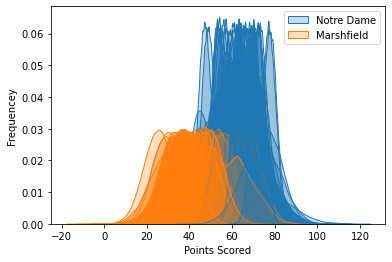

In [128]:
if __name__ == '__main__':
    team_1_name = 'Notre Dame'
    #team_2_name = 'Freedom'
    my_frame_list = []
    for team_in in basketball_data['Team'].unique():
        if team_1_name != team_in:
           team_2_name = team_in 
        else:
            pass
        sim_matchup = simulation(team_1_name, team_2_name, basketball_data)
        team_1, team_2 = sim_matchup.get_teams()
        sim_out = sim_matchup.run_simulations(team_1, team_2)
        monte_carlo_game = sim_matchup.get_frame(team_1, team_2, sim_out)
        sim_matchup.get_visual(monte_carlo_game)
        sim_matchup.print_results(sim_out, monte_carlo_game, my_frame_list)

In [131]:
full = pd.concat(my_frame_list, axis = 'rows')
full.sort_values(by = 'Team_1_Win_Percent')

,Team_1,Team_2,Team_1_Win_Percent,Team_2_Win_Percent,Team_1_Points,Team_2_Points
0,Notre Dame,Edgar,12.86,87.14,53.0,55.5
0,Notre Dame,Freedom,13.77,86.23,53.0,56.0
0,Notre Dame,Lakeland,18.93,81.07,43.5,47.0
0,Notre Dame,Colby,30.14,69.86,67.0,67.5
0,Notre Dame,Newman Catholic,37.20,62.80,64.5,56.5
...,...,...,...,...,...,...
0,Notre Dame,Washburn,100.00,0.00,51.0,55.0
0,Notre Dame,Waukesha North,100.00,0.00,60.5,60.0
0,Notre Dame,Antigo,100.00,0.00,56.0,51.0
0,Notre Dame,Mercer,100.00,0.00,52.0,44.5


In [134]:
full['Win'] = full.apply(lambda x : 1 if x['Team_1_Win_Percent'] > x['Team_2_Win_Percent'] else 0, axis = 'columns')

In [136]:
full[full['Win'] == 0]

,Team_1,Team_2,Team_1_Win_Percent,Team_2_Win_Percent,Team_1_Points,Team_2_Points,Win
0,Notre Dame,Randolph,48.48,51.52,52.0,60.5,0
0,Notre Dame,Waupun,41.13,58.87,50.5,54.5,0
0,Notre Dame,Freedom,13.77,86.23,53.0,56.0,0
0,Notre Dame,Bonduel,42.59,57.41,48.5,63.0,0
0,Notre Dame,Wild Rose,39.32,60.68,57.5,53.0,0
0,Notre Dame,Lakeland,18.93,81.07,43.5,47.0,0
0,Notre Dame,Mineral Point,48.58,51.42,53.5,53.0,0
0,Notre Dame,Elk Mound,47.81,52.19,55.5,54.0,0
0,Notre Dame,Neillsville,49.09,50.91,53.0,48.0,0
0,Notre Dame,Blair-Taylor,42.54,57.46,58.5,57.5,0
